# Nama Dataset: Heart Disease UCI Dataset
**Sumber**: [Kaggle - Heart Disease UCI](https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci)

## Penjelasan Dataset:
Dataset ini merupakan kumpulan data klinis untuk memprediksi kemungkinan adanya penyakit jantung. Dataset ini sering digunakan dalam proyek machine learning dan bersumber dari UCI Machine Learning Repository.

## Struktur Dataset:
Dataset ini berbentuk file CSV yang berisi data numerik dari berbagai pengukuran medis.

## Fitur Dataset:
1. **age** → Usia pasien.
2. **sex** → Jenis kelamin (1 = pria, 0 = wanita).
3. **cp** → Tipe nyeri dada (0–3).
4. **trestbps** → Tekanan darah saat istirahat.
5. **chol** → Kadar kolesterol dalam darah.
6. **fbs** → Gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak).
7. **restecg** → Hasil elektrokardiografi saat istirahat.
8. **thalach** → Detak jantung maksimum yang dicapai.
9. **exang** → Angina yang diinduksi oleh olahraga (1 = ya, 0 = tidak).
10. **oldpeak** → Depresi ST yang diinduksi oleh olahraga.
11. **slope** → Kemiringan segmen ST saat puncak latihan.
12. **ca** → Jumlah pembuluh darah besar yang diwarnai oleh fluoroskopi (0–3).
13. **thal** → Hasil tes thalassemia (3 = normal, 6 = cacat tetap, 7 = cacat reversibel).
14. **target** → Diagnosis penyakit jantung (1 = ada, 0 = tidak ada).

## Jumlah Kelas:
- **0** → Tidak ada penyakit jantung.
- **1** → Ada penyakit jantung.

In [ ]:
import kagglehub

# Mengunduh dataset dari Kaggle
path = kagglehub.dataset_download("mragpavank/heart-diseaseuci")
print("Path ke dataset:", path)

100%|██████████| 3.40k/3.40k [00:00<00:00, 5.91MB/s]

Extracting files...
Path ke dataset: /root/.cache/kagglehub/datasets/mragpavank/heart-diseaseuci/versions/1


# PREPROCESSING DAN EKSTRAKSI FITUR

Preprocessing dilakukan untuk membersihkan dan menyiapkan data mentah agar siap digunakan dalam proses analisis atau pelatihan model.Tujuan dari proses preprocessing adalah untuk memastikan data konsisten, bebas dari noise, dan sesuai dengan kebutuhan algoritma machine learning, sehingga dapat meningkatkan akurasi dan kinerja model secara keseluruhan.



1. Load dan cleaning data yang memiliki missing value

In [ ]:
import pandas as pd

# Membaca dataset
df = pd.read_csv(path + "/heart.csv")

In [ ]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# Menghapus missing value
df.dropna(inplace=True)

2. Exploratory Data Analysis

In [ ]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
print(df.describe())

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None


In [ ]:
print(df["target"].value_counts())

target
1    164
0    138
Name: count, dtype: int64


3. Visualisasi Distribusi Target

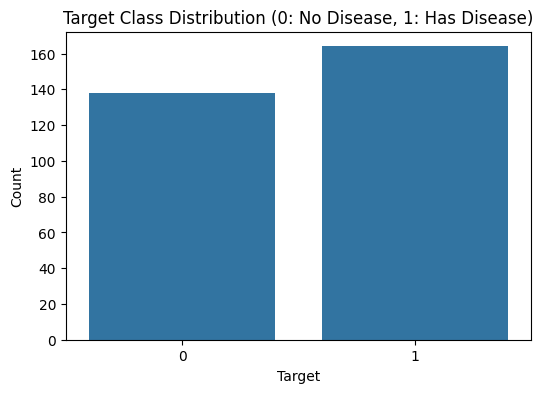

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="target")
plt.title("Target Class Distribution (0: No Disease, 1: Has Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

4. Feature Correlation Analysis (Seleksi Fitur)

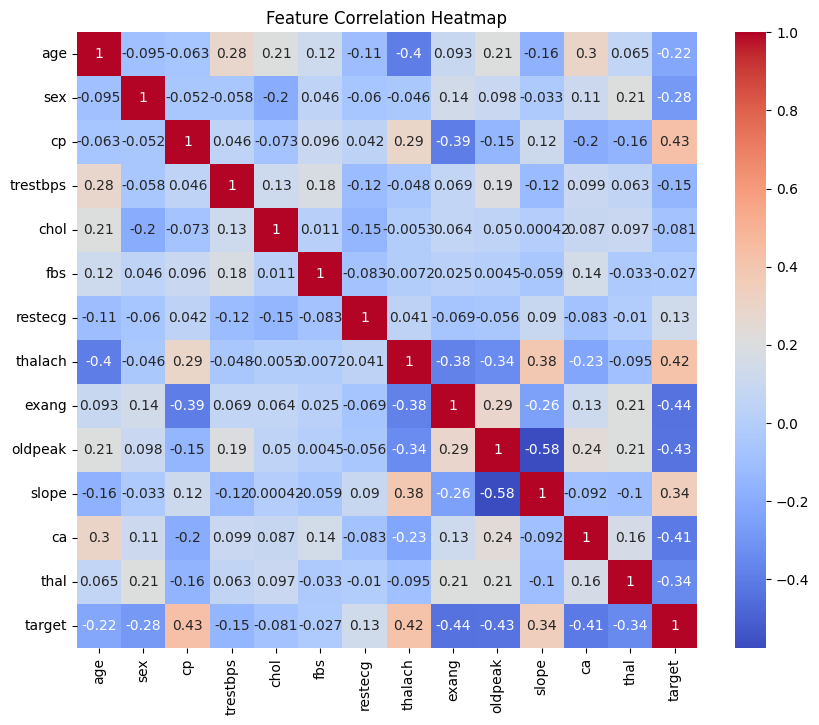

In [ ]:
# Heatmap korelasi fitur
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

5. Standarisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan label
X = df.drop("target", axis=1)
y = df["target"]

# StandardScaler (Z-score normalisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# IMPLEMENTASI MODEL MACHINE LEARNING MENGGUNAKAN KNN

Implementasi model machine learning menggunakan K-Nearest Neighbors (KNN) dilakukan dengan cara membandingkan data baru dengan sejumlah k data terdekat di dalam dataset pelatihan.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

# EKSPERIMEN DAN EVALUASI

1. Evaluasi model KNN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi
y_pred = model.predict(X_test)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[28  1]
 [ 4 28]]


In [ ]:
# Classification report
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

report_df = report_df.round(2)

print("Classification Report:\n")
print(report_df)

Classification Report:

              precision  recall  f1-score  support
0                  0.88    0.97      0.92    29.00
1                  0.97    0.88      0.92    32.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.92    0.92      0.92    61.00
weighted avg       0.92    0.92      0.92    61.00


In [ ]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.80%


2. Visualisasi akurasi model

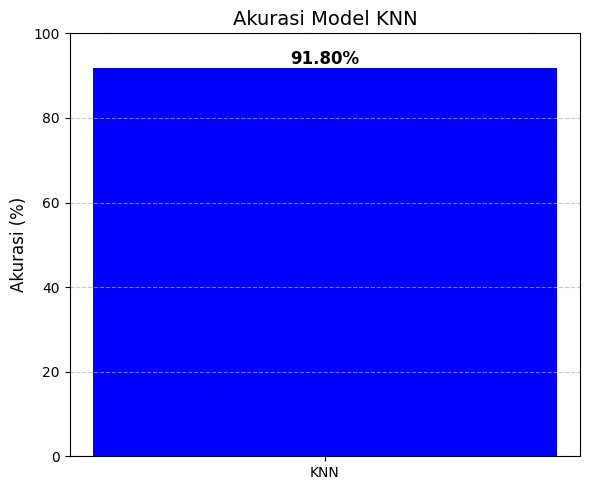

In [ ]:
plt.figure(figsize=(6, 5))
bars = plt.bar(['KNN'], [accuracy * 100], color='blue', width=0.4)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f"{yval:.2f}%", ha='center', fontsize=12, weight='bold')

plt.ylim(0, 100)
plt.ylabel("Akurasi (%)", fontsize=12)
plt.title("Akurasi Model KNN", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Contoh prediksi menggunakan 5 data acak

In [ ]:
import numpy as np

random_indices = np.random.choice(len(X_test), size=5, replace=False)

label_map = {0: "No Disease", 1: "Has Disease"}

print("Sample Predictions:\n")
for idx in random_indices:
    sample = X_test[idx].reshape(1, -1)
    prediction = model.predict(sample)[0]
    true_label = y_test.iloc[idx]

    print(f"Sample Index: {y_test.index[idx]}")
    print(f"→ Predicted: {label_map[prediction]} (class {prediction})")
    print(f"→ Actual:    {label_map[true_label]} (class {true_label})")
    print("-" * 40)

Sample Predictions:

Sample Index: 193
→ Predicted: No Disease (class 0)
→ Actual:    No Disease (class 0)
----------------------------------------
Sample Index: 125
→ Predicted: Has Disease (class 1)
→ Actual:    Has Disease (class 1)
----------------------------------------
Sample Index: 17
→ Predicted: Has Disease (class 1)
→ Actual:    Has Disease (class 1)
----------------------------------------
Sample Index: 199
→ Predicted: No Disease (class 0)
→ Actual:    No Disease (class 0)
----------------------------------------
Sample Index: 255
→ Predicted: No Disease (class 0)
→ Actual:    No Disease (class 0)
----------------------------------------
